<a href="https://colab.research.google.com/github/VictorWentz/mini-project-rooftop/blob/main/Analise_de_dados_Rooftop_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados da Rooftop investimento imobiliários

A [RoofTop](https://www.rooftop.com.br/) é uma das maiores empresas do ramo imobiliário brasileiro, e quer expandir sua área de atuação fazendo um investimento internacional, com isso, ela contratou você para uma consultoria estratégica.

<center><img alt="rooftop" width="50%" src="https://uploads-ssl.webflow.com/5e511ae8fd13de6db674868b/5f355953925d4fc127e4c38d_Logo%20Slogan%20-%20Fundo%20Roxo.jpg"></center>

A empresa irá investir em imóveis no Condado de King, nos Estados Unidos.

King County - Condado de King - Washington

O condado de King é um dos 39 condados do estado americado de washington. A sede e cidade mais populosa do condado é Seattle.

Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo com o censo nacional de 2020, é o condado mais populoso do estado e o 12° mais populoso do país.



# Objetivo

A empresa te contratou pois quer saber qual seria os 5 imóveis que ela deveria investir e o porquê e quais 5 você não recomendaria o investimento de jeito nenhum.

# Download dos Dados

Para resolver este problema, vamos utilizar dados de vendas de casas entre os anos de 2014 e 2015 no condado de King. 

Executar o código abaixo, para obter os dados.

In [ ]:
!wget "https://geodacenter.github.io/data-and-lab/data/kingcounty.zip"

--2022-02-16 16:12:55--  https://geodacenter.github.io/data-and-lab/data/kingcounty.zip
Resolving geodacenter.github.io (geodacenter.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to geodacenter.github.io (geodacenter.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4061729 (3.9M) [application/zip]
Saving to: ‘kingcounty.zip.1’

kingcounty.zip.1    100%[===================>]   3.87M  --.-KB/s    in 0.05s   

2022-02-16 16:12:55 (70.9 MB/s) - ‘kingcounty.zip.1’ saved [4061729/4061729]



In [ ]:
!unzip "/content/kingcounty.zip"

Archive:  /content/kingcounty.zip
replace kingcounty/kc_house.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/kingcounty/._kc_house.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace __MACOSX/kingcounty/._kc_house.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/kingcounty/._kc_house.dbf  
  inflating: kingcounty/kc_house.prj  
  inflating: __MACOSX/kingcounty/._kc_house.prj  
  inflating: kingcounty/kc_house.shp  
  inflating: __MACOSX/kingcounty/._kc_house.shp  
  inflating: kingcounty/kc_house.shx  
  inflating: __MACOSX/kingcounty/._kc_house.shx  
  inflating: kingcounty/kc_house_data.csv  
  inflating: __MACOSX/kingcounty/._kc_house_data.csv  
  inflating: kingcounty/King_county_zip.dbf  
  inflating: __MACOSX/kingcounty/._King_county_zip.dbf  
  inflating: kingcounty/King_county_zip.geojson  
  inflating: __MACOSX/kingcounty/._King_county_zip.geojson  
  inflating: kingcounty/King_county_zip.prj  
  inflating: __MACOS

# Importação dos Dados

In [ ]:
# Bibliotecas necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
# Carregando dos dados em um DataFrame
data = pd.read_csv('/content/kingcounty/kc_house_data.csv')

# Descrição dos Dados

Breve descrição dos dados, para entender o que cada atribuito significa.

**Dicionário das variáveis**

* `id`	Identificador único do imóvel
* `date`	Data da venda
* `price`	Preço da venda
* `bedrooms`	N° de Quartos
* `bathrooms`	N° de banheiros
* `sqft_liv`	Tamanho da área habitável em ft²
* `sqft_lot`	Tamanho do terrono em ft²
* `floors`	Número de andares
* `waterfront`	‘1’ Se é beira-mar, ‘0’ se não.
* `view`	Grau de quão belo é a vista do imóvel (0 a 4)
* `condition`	Condição da casa (1 a 5)
* `grade`	Classificação por qualidade de material utilizado na construção. 
* `sqft_above`	Área acima do solo em ft²
* `sqft_basmt`  Área abaixo do solo em ft²
* `yr_built`	Ano de construção
* `yr_renov`	Ano de restauração. ‘0’ se nunca restaurada
* `zipcode`	Zip Code
* `lat`	Latitude
* `long`	Longitude
* `squft_liv15`	Média da área habitável dos 15 imóveis mais próximos, em ft²
* `squft_lot15`	Média da área do lote dos 15 imóveis mais próximos, em ft²
* `Shape_leng`	Tamanho do poligono em metros
* `Shape_Area`	Área do poligono em m²

# Exploração dos Dados

Antes de iniciar qualquer exploração, é sempre interessante dar uma olhada nas 5 primeiras linhas dos seus dados.

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Q1. Qual é o tamanho do dataset? E os tipos das variáveis?


---


O nosso dataset, possui:
  *   21613 casas
  *   21 atributos



Type dos Atributos: 

| Atributo      	| Type      	|   	|
|---------------	|-----------	|---	|
| id            	| int64     	|   	|
| date          	| object    	|   	|
| price         	| float64   	|   	|
| bedrooms      	| int64     	|   	|
| bathrooms     	| float64   	|   	|
| sqft_living   	| int64     	|   	|
| sqft_lot      	| int64     	|   	|
| floors        	| float64   	|   	|
| waterfront    	| int64     	|   	|
| view          	| int64     	|   	|
| condition     	| int64     	|   	|
| grade         	| int64     	|   	|
| sqft_above    	| int64     	|   	|
| sqft_basement 	| int64     	|   	|
| yr_built      	| int64     	|   	|
| yr_renovated  	| int64     	|   	|
| zipcode       	| int64     	|   	|
| lat           	| float64   	|   	|
| long          	| float64   	|   	|
| sqft_living15 	| int64     	|   	|
| sqft_lot15    	| int64     	|   	|



Notamos que o atributo `bathrooms` e `Floors`, são do tipo `float64`, o que é estranho em um primeiro momento. Porém, em algumas pesquisas, encontramos que `bathrooms` com valores quebrados ([link](https://www.quora.com/What-does-2-5-bathrooms-mean) ), na verdade possuem um significado. O mesmo vale para os `Floors` ([link](https://www.gimme-shelter.com/what-is-a-1-5-storey-house-50104/#:~:text=A%20one-and-a-,a%20%E2%80%9Chalf%20storey%20house%E2%80%9D)).


In [ ]:
print(f'Temos: {data.shape[0]} entradas')
print(f'Temos: {data.shape[1]} atributos')

Temos: 21613 entradas
Temos: 21 atributos


In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Q2. Qual a porcentagem de valores ausentes no dataset?

O dataset não possui dados faltantes, então não precisamos nos preocupar com a limpeza de valores nulos no dataset.


In [ ]:
(data.isna().sum().sort_values(ascending=False) / data.shape[0]) * 100

id               0.0
grade            0.0
sqft_living15    0.0
long             0.0
lat              0.0
zipcode          0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
date             0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
price            0.0
sqft_lot15       0.0
dtype: float64

## Q3. Adicionando informação de região.

Utilizando o site [King County GIS](https://gis-kingcounty.opendata.arcgis.com/), encontramos o [dataset](https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::zipcodes-for-king-county-and-surrounding-area-zipcode-area/about), que possui os nomes de cada local atraves do zipcode, portanto vamos adicionar esta informação no nosso dataset.

Apos adicionar a região de cada moradia no nosso dataset, conseguimos obter a seguinte informação:

| Região        	| N° de casas 	|   	|
|---------------	|-------------	|---	|
| SEATTLE       	| 8977        	|   	|
| RENTON        	| 1597        	|   	|
| BELLEVUE      	| 1407        	|   	|
| KENT          	| 1203        	|   	|
| REDMOND       	| 979         	|   	|
| KIRKLAND      	| 977         	|   	|
| AUBURN        	| 912         	|   	|
| FEDERAL WAY   	| 779         	|   	|
| ISSAQUAH      	| 733         	|   	|
| MAPLE VALLEY  	| 590         	|   	|
| WOODINVILLE   	| 471         	|   	|
| SAMMAMISH     	| 441         	|   	|
| SAMMAMIISH    	| 359         	|   	|
| SNOQUALMIE    	| 310         	|   	|
| KENMORE       	| 283         	|   	|
| MERCER ISLAND 	| 282         	|   	|
| ENUMCLAW      	| 234         	|   	|
| NORTH BEND    	| 221         	|   	|
| BOTHELL       	| 195         	|   	|
| DUVALL        	| 190         	|   	|
| CARNATION     	| 124         	|   	|
| VASHON        	| 118         	|   	|
| BLACK DIAMOND 	| 100         	|   	|
| FALL CITY     	| 81          	|   	|
| MEDINA        	| 50          	|   	|

In [ ]:
# Dados do zipcode
zip_data = pd.read_csv('/content/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.csv')

In [ ]:
zip_data.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,COUNTY_NAME,PREFERRED_CITY,Shape_Length,Shape_Area
0,1,98001,98001,33,Standard,King County,AUBURN,148134.770976,5.261214e+08
1,2,98002,98002,33,Standard,King County,AUBURN,105168.476815,2.044452e+08
2,3,98003,98003,33,Standard,King County,FEDERAL WAY,121645.070704,3.169812e+08
3,4,98004,98004,33,Standard,King County,BELLEVUE,99252.932327,2.505466e+08
4,5,98005,98005,33,Standard,King County,BELLEVUE,116930.355168,2.112733e+08


Vamos utilizar somente as coluna `ZIPCODE` e `PREFERRED_CITY`.

In [ ]:
zip_data = zip_data[['ZIPCODE', "PREFERRED_CITY"]]

In [ ]:
# Função para linkar o zipcode do dataset original, com o dataset de zipcodes
def cityNames(data, zipdata):
  data_zips = data.zipcode.values
  city_names = []
  for zips in data_zips:
    city_names.append(zipdata[(zipdata.ZIPCODE == zips)]['PREFERRED_CITY'].to_list()[0])
  return city_names

In [ ]:
data['City'] = cityNames(data, zip_data)

In [ ]:
data.City.value_counts()

SEATTLE          8977
RENTON           1597
BELLEVUE         1407
KENT             1203
REDMOND           979
KIRKLAND          977
AUBURN            912
FEDERAL WAY       779
ISSAQUAH          733
MAPLE VALLEY      590
WOODINVILLE       471
SAMMAMISH         441
SAMMAMIISH        359
SNOQUALMIE        310
KENMORE           283
MERCER ISLAND     282
ENUMCLAW          234
NORTH BEND        221
BOTHELL           195
DUVALL            190
CARNATION         124
VASHON            118
BLACK DIAMOND     100
FALL CITY          81
MEDINA             50
Name: City, dtype: int64

## Q4. O atributo `id` é um identificador único, sera que existe duplicatas?

Temos que o atributo `id` possui 21436 valores únicos, isso significa que existem imóveis que aparecem mais de uma vez.

Analisando esses valores, notamos que são casas que foram compradas e vendidas em datas distintas.

Com esta informação, podemos fazer duas análises. A Primeira é construir uma estimativa de valorização futura, além de descobrir as regiões que mais tiveram rotatividade, e que valorizaram mais.

A segunda análise, é que podemos descobrir se alguma casa desvalorizou.

Os index das casas duplicadas foram salvos na variável `casas_duplicadas`, iremos utilizar ela futuramente. 

Para continuar as outras análises, vamos remover a primeira ocorrência da duplicata, ficando assim com a última data que a casa foi vendida.

In [ ]:
data['id'].nunique()

21436

In [ ]:
data[data.duplicated(['id'], keep = False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,SEATTLE
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,SEATTLE
313,4139480200,20140618T000000,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,BELLEVUE
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,BELLEVUE
324,7520000520,20140905T000000,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,SEATTLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,NORTH BEND
20779,6300000226,20140626T000000,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,SEATTLE
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,SEATTLE
21580,7853420110,20141003T000000,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,SNOQUALMIE


In [ ]:
casas_duplicadas = data[data.duplicated(['id'], keep = False)].index

In [ ]:
# Index das primeiras ocorrencias das duplicatas
indx = data[data.duplicated(['id'], keep = 'first')].index

# Copia dos dados originais
original_data = data.copy()

# Drop das duplicatas.
data.drop(indx, inplace = True)
data.reset_index(drop = True, inplace=True)

## Q5. Calculo Potencial de Valorização e Casas Desvalorizadas.

Nesta secção, vamos calcular um possivel potencial de valorização para as regiões que tiveram suas casas compradas e vendidas. Com esta analise, vamos ficar com as 5 regiões que mais bem valorizaram, e tiveram a maior quantidade de compra e venda.

|  **Região** 	| **Q°** 	| **Valorização** 	|
|:-----------:	|:------:	|:---------------:	|
|   SEATTLE   	|   86   	|     0.472714    	|
|    RENTON   	|   17   	|     0.499191    	|
| FEDERAL WAY 	|   11   	|     0.519285    	|
|   BELLEVUE  	|   11   	|     0.207804    	|
|     KENT    	|    8   	|     0.611788    	|



Notamos tambem que a unica região que teve seu imovel desvalorizado, foi a região de BLACK DIAMOND, com a casa de `ID: 7167000040`.

### Q5-1. Potencial de Valorização

In [ ]:
data_duplicated = original_data.iloc[casas_duplicadas]
data_duplicated.reset_index(drop=True,inplace=True)

Em Seattle teve uma casa que foi vendida 3 vezes, por isso o numero quebrado. Como esta casa é um caso especial, para facilitar o nosso trabalho, vamos retirar ela do dataset.

In [ ]:
data_duplicated['City'].value_counts() / 2

SEATTLE          86.0
RENTON           17.0
BELLEVUE         12.0
FEDERAL WAY      11.0
KENT              8.0
REDMOND           6.0
SAMMAMISH         6.0
AUBURN            5.0
KIRKLAND          3.0
MAPLE VALLEY      3.0
SNOQUALMIE        3.0
WOODINVILLE       3.0
ISSAQUAH          2.0
NORTH BEND        2.0
CARNATION         1.0
BLACK DIAMOND     1.0
FALL CITY         1.0
VASHON            1.0
BOTHELL           1.0
KENMORE           1.0
MEDINA            1.0
SAMMAMIISH        1.0
Name: City, dtype: float64

In [ ]:
idx = data_duplicated['id'].value_counts().index[0]
data_duplicated.drop(data_duplicated.query("id == @idx").index, inplace=True)

O código abaixo, percorre o dataframe de 2 em 2. Pegando o valor do preço posterior e dividindo pelo valor de preço anterior. 

Portanto se o valor for maior que 1, o numero apos a virgula, é a % que o preço da casa subiu.

Se o preço for menor que 1. pegamos o resultado e tiramos de 1, resultando na % que o valor caiu.

Casas que mantiveram o mesmo valor, podem ser excluidas das nossas contas.

Caso a casa tenha tido uma super valorização, o valor da divisão, vai ser maior que 2, sabendo disso, a casa vai ter valorizado 1 + valor depois da virgula.

In [ ]:
potVal = {
    'City': [],
    'Value': []
}

p1 = 0
p2 = 2

for i in range(int(len(data_duplicated) / 2)):

  house = data_duplicated[p1:p2]
  valor = house['price'].values[1] / house['price'].values[0]
  valor_q = math.modf(valor)
  #print(valor_q)

  if valor_q[1] != 0.0:
    if valor_q[0] != 0.0:
      potVal['Value'].append(valor_q[0])
      potVal['City'].append(house['City'].values[0])
  elif valor_q[1] >= 2.0:
    potVal['Value'].append((valor_q[1] - 1) + valor_q[0])
    potVal['City'].append(house['City'].values[0])
  else:
    potVal['Value'].append(valor_q[0]-1)
    potVal['City'].append(house['City'].values[0])
  

  p1+=2
  p2+=2

In [ ]:
# Transformando em um DataFrame
potVal = pd.DataFrame.from_dict(potVal)

In [ ]:
potVal.groupby(['City']).agg({
    'City': ['count'],
    'Value':['mean']
}).sort_values([('City', 'count')], ascending=False)

,City,Value
,count,mean
City,,
SEATTLE,86,0.472714
RENTON,17,0.499191
FEDERAL WAY,11,0.519285
BELLEVUE,11,0.207804
KENT,8,0.611788
REDMOND,6,0.194711
AUBURN,5,0.579266
SAMMAMISH,5,0.616566


### Q5-2. Casas Desvalorizadas

Para descobrir as casas que desvalorizaram, vamos fazer o mesmo processo que a seção **Q5-1**, porem vamos ficar apenas com os valores abaixo de 1.

In [ ]:
indx = []

p1 = 0
p2 = 2

for i in range(int(len(data_duplicated) / 2)):

  house = data_duplicated[p1:p2]
  valor = house['price'].values[1] / house['price'].values[0]
  
  if valor < 1.0:
    indx.append(house.index)
  #print(valor_q)
  p1+=2
  p2+=2

In [ ]:
indx = [i[0] for i in indx]

In [ ]:
data_duplicated.loc[indx]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
14,8682262400,20140718T000000,430000.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479,REDMOND
84,2726049071,20141211T000000,510000.0,2,1.00,820,4206,1.0,0,0,3,5,820,0,1949,0,98125,47.7076,-122.284,1810,7200,SEATTLE
118,4139420590,20140520T000000,1212500.0,4,3.50,4560,16643,1.0,0,3,3,12,2230,2330,1995,0,98006,47.5521,-122.115,4060,15177,BELLEVUE
182,2767603612,20140512T000000,500000.0,2,2.25,1290,1334,3.0,0,0,3,8,1290,0,2007,0,98107,47.6719,-122.382,1350,1334,SEATTLE
236,7167000040,20140813T000000,740000.0,4,3.00,3350,199253,2.0,0,0,3,10,3350,0,2004,0,98010,47.3602,-121.988,3350,183897,BLACK DIAMOND
274,2619920170,20141001T000000,772500.0,4,2.50,3230,4290,2.0,0,0,3,9,3230,0,2004,0,98033,47.6874,-122.161,3220,5083,KIRKLAND


## Q6. Outliers Presentes?

Agora um passo importante da nossa análise, é verificar a presença de outliers.


---

Atributo `Price`: Notamos que o atributo price possui 75% dos seus valores abaixo de $645.000,000, o certo a se fazer, seria entrar em contato com o gerente da Rooftop, e perguntar o valor máximo que eles investiriam em uma casa. Mas caso essa informação não seja possivel de ser obtida, de bom senso, eliminamos as casas que passam de um milhão de dolares.


---

Atributo `bedrooms`: Esta coluna, tem como seu valor máximo 33. O que não faz muito sentido a não ser que seja uma mansão, portanto iremos remover do dataset tbm.

---

Atributo `grade`: Esta coluna representa a qualidade do material utilizado na construção da casa, portanto investir em uma moradia com qualidade abaixo de 6, não é um bom negocio.

In [ ]:
data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors',  'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',   
        'sqft_living15', 'sqft_lot15']].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.143600e+04,21436.000000,21436.000000,21436.000000,2.143600e+04,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000,21436.000000
mean,5.405293e+05,3.371571,2.117349,2082.704936,1.513564e+04,1.496198,0.235118,3.410384,7.661737,1790.960440,291.744495,1988.314378,12785.961280
std,3.676893e+05,0.929205,0.769913,919.146469,4.153862e+04,0.540388,0.767092,0.650235,1.174256,829.026491,442.781983,685.699093,27375.467469
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.221500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069625e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,2370.000000,10087.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


## Q7. Limpando os dados.

Até o momento, temos as seguintes premissas.

* Valor das casas não pode passar de um milhão de dolares.
* Investir em casas com `grade` acima de 6.
* Investir em casas que estão nas regiões mais bem valorizadas.
* Investir em casas novas, ou reformadas recentemente. (acima de 2005)


In [ ]:
# Casas em regiões valorizadas.
region = ["SEATTLE", "RENTON", "FEDERAL WAY", "BELLEVUE",	 "KENT"]
data_clean = data.query('City == @region')
data_clean.shape

(13827, 22)

In [ ]:
# Grade acima ou igual a 6.
data_clean = data_clean.query('grade >= 6')
data_clean.shape

(13647, 22)

In [ ]:
# Casas novas
data_clean = data_clean.query('yr_renovated >= 2005 | yr_built >= 2005')
data_clean.shape

(2065, 22)

In [ ]:
# Casas abaixo de um milhao.
data_clean = data_clean.query('price < 1e6')
data_clean.shape

(1834, 22)

## Q8. Adicionando o preço/ft^2

In [ ]:
data_clean['price/ft2'] = data_clean['price'] / data_clean['sqft_living']

## Q9. Criminal Rate

Utilizando o [site](https://kingcounty.gov/services/data.aspx), é possivel obter dados do historico criminal([link](https://data.kingcounty.gov/Law-Enforcement-Safety/KCSO-Incident-Dataset-Historic-to-2019/rzfs-wyvy)). 

Utilizando os ultimos 3 anos do dataset. Que são os anos de 2019, 2018 e 2017, seattle teve o maior indice de crimes cometidos, de toda região de WA.

In [ ]:
lawData = pd.read_csv("/content/KCSO_Incident_Dataset__Historic_to_2019.csv",
                      index_col= 'incident_datetime', 
                      parse_dates = True)

In [ ]:
lawData_copy = lawData[lawData.index.year >= 2017].copy()
lawData_copy = lawData_copy.query('state == "WA"')
lawData = lawData_copy.query('city == @region')

In [ ]:
result = lawData.city.value_counts() / lawData_copy.shape[0]
result

SEATTLE        0.381413
RENTON         0.103838
KENT           0.059244
FEDERAL WAY    0.025257
BELLEVUE       0.003502
Name: city, dtype: float64

In [ ]:
result = pd.DataFrame(result).reset_index()
result.columns = ['City', 'Crimital_rate']

In [ ]:
data_clean = data_clean.merge(result, 'left', on='City')

## Q10. Correlação

Notamos que com o gráfico de correlação, algumas variáveis, possuem uma correlação maior com o atributo `price`, elas são: `bedrooms`, `bathrooms`, `ft²`, `grade`(qualidade do material), `ft² acima`.

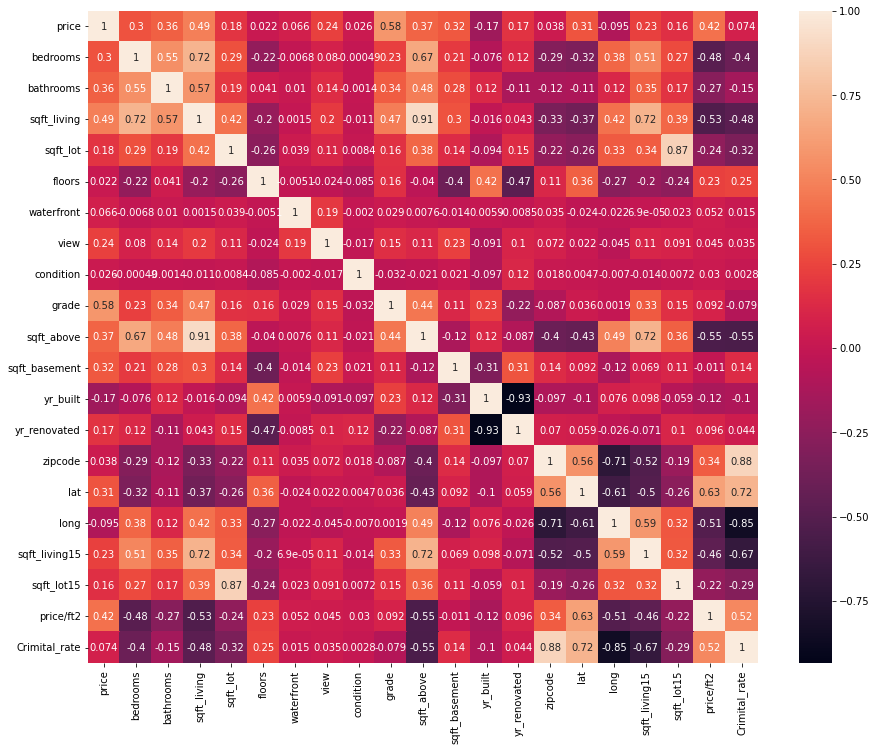

In [ ]:
# mostrar a matriz de correlação
plt.figure(figsize=(15,12));
sns.heatmap(data_clean.drop(['id'], axis=1).corr(), annot=True,);

# Rankeamento das moradias

Agora que terminamos nossa etapa de exploração e analise, terminamos com um dataset com 1834 moradias para investir, mas como escolher 5?

Vamos criar um sistema de rank, utilizando a função do pandas [rank](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html) que vai distribuir valores para as colunas, de acordo com a logica que definirmos. Assim, no final, iremos encontrar as casas mais bem rankeadas.

In [ ]:
data_clean.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'City', 'price/ft2',
       'Crimital_rate'],
      dtype='object')

In [ ]:
data_clean.shape

(1834, 24)

In [ ]:
data_clean['rank_price']       = data_clean['price'].rank(ascending=False, method='min') # Barato Melhor
data_clean['rank_bedrooms']    = data_clean['bedrooms'].rank(ascending=True, method='min') # Mais quartos, melhor
data_clean['rank_bathrooms']   = data_clean['bathrooms'].rank(ascending=True, method='min') # Mais banheiros, melhor
data_clean['rank_sqft_living'] = data_clean['sqft_living'].rank(ascending=True, method='min') 
data_clean['rank_sqft_lot']    = data_clean['sqft_lot'].rank(ascending=True, method='min')
data_clean['rank_floors']      = data_clean['floors'].rank(ascending=True, method='min')
data_clean['rank_water']       = data_clean['waterfront'].rank(ascending=True, method='min')
data_clean['rank_view']        = data_clean['view'].rank(ascending=True, method='min')
data_clean['rank_condition']   = data_clean['condition'].rank(ascending=True, method='min')
data_clean['rank_grade']       = data_clean['grade'].rank(ascending=True, method='min')
data_clean['rank_above']       = data_clean['sqft_above'].rank(ascending=True, method='min')
data_clean['rank_basement']    = data_clean['sqft_basement'].rank(ascending=True, method='min')
data_clean['rank_yr_built']    = data_clean['yr_built'].rank(ascending=True, method='min')
data_clean['rank_renovated']   = data_clean['yr_renovated'].rank(ascending=True, method= 'min')
data_clean['rank_living15']    = data_clean['sqft_living15'].rank(ascending=True, method= 'min')
data_clean['rank_lot15']       = data_clean['sqft_lot15'].rank(ascending=True, method= 'min')
data_clean['rank_priceft2']    = data_clean['price/ft2'].rank(ascending=False, method= 'min')
data_clean['rank_criminal']    = data_clean['Crimital_rate'].rank(ascending=False, method= 'min')

In [ ]:
rank_columns = [col for col in data_clean.columns if 'rank_' in col]

In [ ]:
data_clean['Ranking Total'] = data_clean[rank_columns].sum(axis=1)

Com isto, podemos verificar agora as casas mais bem rankeadas, as casas que não foram rankeadas tão bem, e as casas mais baratas.

In [ ]:
casas_baratas = data_clean['price'].sort_values()[:5].index
casas_bRank = data_clean['Ranking Total'].sort_values(ascending=False)[:5].index
casas_lRank = data_clean['Ranking Total'].sort_values()[:5].index

## Moradias melhores rankeadas

In [ ]:
data_clean.loc[casas_bRank]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,price/ft2,Crimital_rate,rank_price,rank_bedrooms,rank_bathrooms,rank_sqft_living,rank_sqft_lot,rank_floors,rank_view,rank_condition,rank_grade,rank_above,rank_basement,rank_living15,rank_lot15,rank_priceft2,rank_criminal,Ranking Total,rank_water,rank_yr_built,rank_renovated
1537,2424059170,20150219T000000,900000.0,5,6.0,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859,BELLEVUE,126.404494,0.003502,62.0,1688.0,1834.0,1834.0,1823.0,209.0,1829.0,1.0,1834.0,1834.0,1829.0,1819.0,1824.0,1787.0,1790.0,22628.0,1.0,629.0,1.0
1138,521049227,20141201T000000,950000.0,4,4.0,5635,9695,2.0,0,3,3,10,4360,1275,2011,0,98003,47.3389,-122.334,3726,9765,FEDERAL WAY,168.589175,0.025257,31.0,1196.0,1812.0,1833.0,1719.0,209.0,1813.0,1.0,1768.0,1830.0,1814.0,1829.0,1714.0,1526.0,1753.0,22165.0,1.0,1315.0,1.0
86,5379804150,20150211T000000,598800.0,6,4.0,4470,17877,3.0,0,3,3,9,3230,1240,2013,0,98188,47.4514,-122.273,1790,18260,SEATTLE,133.959732,0.381413,438.0,1821.0,1812.0,1825.0,1803.0,1437.0,1813.0,1.0,1424.0,1764.0,1809.0,1177.0,1807.0,1759.0,1.0,22135.0,1.0,1442.0,1.0
873,2867300160,20140904T000000,450000.0,5,3.5,3931,9497,2.0,0,0,3,10,2650,1281,2014,0,98023,47.3008,-122.386,3510,9497,FEDERAL WAY,114.474688,0.025257,936.0,1688.0,1666.0,1809.0,1708.0,209.0,1.0,1.0,1768.0,1543.0,1815.0,1823.0,1701.0,1812.0,1753.0,21765.0,1.0,1530.0,1.0
790,722059020,20150318T000000,550000.0,6,4.5,4520,40164,2.0,0,0,3,9,3580,940,1953,2008,98031,47.4070,-122.216,2870,13068,KENT,121.681416,0.059244,549.0,1821.0,1827.0,1827.0,1822.0,209.0,1.0,1.0,1424.0,1815.0,1749.0,1710.0,1781.0,1801.0,1580.0,21737.0,1.0,143.0,1676.0


## Moradias piores rankeadas

In [ ]:
data_clean.loc[casas_lRank]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,price/ft2,Crimital_rate,rank_price,rank_bedrooms,rank_bathrooms,rank_sqft_living,rank_sqft_lot,rank_floors,rank_view,rank_condition,rank_grade,rank_above,rank_basement,rank_living15,rank_lot15,rank_priceft2,rank_criminal,Ranking Total,rank_water,rank_yr_built,rank_renovated
82,3319500922,20150421T000000,345000.0,2,1.5,830,920,2.0,0,0,3,7,830,0,2005,0,98144,47.5998,-122.306,830,1200,SEATTLE,415.662651,0.381413,1425.0,18.0,57.0,21.0,89.0,209.0,1.0,1.0,26.0,65.0,1.0,5.0,156.0,148.0,1.0,2442.0,1.0,217.0,1.0
1397,9524100196,20141117T000000,239000.0,2,1.5,680,772,2.0,0,0,3,7,680,0,2005,0,98103,47.6950,-122.343,690,1059,SEATTLE,351.470588,0.381413,1794.0,18.0,57.0,5.0,22.0,209.0,1.0,1.0,26.0,8.0,1.0,1.0,53.0,401.0,1.0,2817.0,1.0,217.0,1.0
1187,3869900146,20141030T000000,306500.0,2,1.0,840,892,2.0,0,0,3,7,840,0,2006,0,98136,47.5396,-122.387,1030,1007,SEATTLE,364.880952,0.381413,1602.0,18.0,4.0,31.0,69.0,209.0,1.0,1.0,26.0,78.0,1.0,44.0,33.0,337.0,1.0,2865.0,1.0,408.0,1.0
764,2197600388,20141202T000000,350000.0,2,1.5,830,1077,2.0,0,0,3,7,830,0,2006,0,98122,47.6058,-122.319,830,1366,SEATTLE,421.686747,0.381413,1391.0,18.0,57.0,21.0,217.0,209.0,1.0,1.0,26.0,65.0,1.0,5.0,368.0,135.0,1.0,2926.0,1.0,408.0,1.0
997,9524100207,20150130T000000,245000.0,2,1.5,690,1058,2.0,0,0,3,7,690,0,2005,0,98103,47.6951,-122.343,690,1058,SEATTLE,355.072464,0.381413,1789.0,18.0,57.0,6.0,196.0,209.0,1.0,1.0,26.0,9.0,1.0,1.0,52.0,382.0,1.0,2968.0,1.0,217.0,1.0


## Moradias baratas

In [ ]:
data_clean.loc[casas_baratas]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,price/ft2,Crimital_rate,rank_price,rank_bedrooms,rank_bathrooms,rank_sqft_living,rank_sqft_lot,rank_floors,rank_view,rank_condition,rank_grade,rank_above,rank_basement,rank_living15,rank_lot15,rank_priceft2,rank_criminal,Ranking Total,rank_water,rank_yr_built,rank_renovated
511,9320900610,20141231T000000,146000.0,3,1.0,900,4770,1.0,0,0,3,6,900,0,1969,2009,98023,47.3038,-122.362,900,3480,FEDERAL WAY,162.222222,0.025257,1834.0,318.0,4.0,44.0,1180.0,1.0,1.0,1.0,1.0,119.0,1.0,11.0,857.0,1572.0,1753.0,9576.0,1.0,193.0,1685.0
1189,6056100150,20140623T000000,160797.0,3,1.5,1270,2356,2.0,0,0,3,7,1270,0,2012,0,98108,47.5671,-122.298,1490,2175,SEATTLE,126.611811,0.381413,1833.0,318.0,57.0,301.0,861.0,209.0,1.0,1.0,26.0,573.0,1.0,716.0,689.0,1785.0,1.0,8745.0,1.0,1371.0,1.0
973,6056100165,20141201T000000,175003.0,3,1.5,1390,1882,2.0,0,0,3,7,1390,0,2014,0,98108,47.5667,-122.297,1490,2175,SEATTLE,125.901439,0.381413,1832.0,318.0,57.0,485.0,768.0,209.0,1.0,1.0,26.0,728.0,1.0,716.0,689.0,1788.0,1.0,9152.0,1.0,1530.0,1.0
69,8651430560,20140522T000000,180000.0,3,1.0,870,5330,1.0,0,0,3,6,870,0,1969,2014,98042,47.3690,-122.077,840,5200,KENT,206.896552,0.059244,1831.0,318.0,4.0,38.0,1328.0,1.0,1.0,1.0,1.0,103.0,1.0,8.0,1242.0,1226.0,1580.0,9629.0,1.0,193.0,1752.0
1413,6056100160,20140728T000000,182568.0,4,1.5,1500,2106,2.0,0,0,3,7,1500,0,2014,0,98108,47.5669,-122.297,1490,2175,SEATTLE,121.712000,0.381413,1830.0,1196.0,57.0,654.0,817.0,209.0,1.0,1.0,26.0,853.0,1.0,716.0,689.0,1800.0,1.0,10383.0,1.0,1530.0,1.0


# Respostas.

Agora que temos as informações necessarias, chegou a hora de decidir as 5 melhores casas para investir, e as 5 para não investir.


## 5 Casas para investir

Em todo investimento, é fundamental não colocar todo o seu dinheiro em um unico lugar, portanto temos que diversificar. Notamos que as casas mais baratas possuem o rank melhor que as casas piores rankeadas. Portanto nossa escolha, vai ser entre 2 casas melhores rankeadas, e 3 casas baratas. 

E elas são:

* `id: 9320900610`: 169th Place Southeast, Bellevue, King County
* `id: 722059020`: 9420, South 218th Street, Kent, King County
* `id: 9320900610`: 33266, 22nd Court Southwest, Twin Lakes, Federal Way
* `id: 6056100165`: 4065, Martin Luther King Junior Way South, Rainier Vista, Seattle
* `id: 6056100160 `: 4055, Martin Luther King Junior Way South, Rainier Vista, Seattle

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'endereco')
for (lat, lon) in zip(data_clean.loc[casas_bRank]['lat'], data_clean.loc[casas_bRank]['long']):
  print(geolocator.reverse(f'{lat}, {lon}'))

169th Place Southeast, Bellevue, King County, Washington, 98006, United States
29316, 1st Avenue South, Mar Cheri, Federal Way, King County, Washington, 98003, United States
4810, South 170th Street, McMicken Heights, SeaTac, King County, Washington, 98188, United States
4217, Southwest 335th Place, Federal Way, King County, Washington, 98023, United States
9420, South 218th Street, Kent, King County, Washington, 98031, United States


In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'endereco')
for (lat, lon) in zip(data_clean.loc[casas_baratas]['lat'], data_clean.loc[casas_baratas]['long']):
  print(geolocator.reverse(f'{lat}, {lon}'))

33266, 22nd Court Southwest, Twin Lakes, Federal Way, King County, Washington, 98023, United States
Dakota P-Patch Emergency Hub, South Lilac Street, Rainier Vista, Seattle, King County, Washington, 98144, United States
4065, Martin Luther King Junior Way South, Rainier Vista, Seattle, King County, Washington, 98108, United States
19654, Southeast 260th Street, Timberlane, Covington, King County, Washington, 98042, United States
4055, Martin Luther King Junior Way South, Rainier Vista, Seattle, King County, Washington, 98108, United States


## 5 Casas para não investir

As 5 casas para não investir, são aquelas casas que são caras, e possuem uma pessima qualidade de material, e de condição. Alem da casa que fica em uma região desvalorizada.

E elas são: 

* `id: 7167000040`: 26719, Southeast 271st Street, Ravensdale, King County
* `id: 742000060`: 16929, Northeast 82nd Street, Redmond, King County
* `id: 6613000935`: 4437, 55th Avenue Northeast, Laurelhurst, Seattle
* `id: 9808700025`: 3873, 95th Avenue Northeast, Yarrow Point, King County
* `id: 7237550310`:  25005, Northeast Patterson Way, Union Hill-Novelty Hill, King County

In [ ]:
idx = original_data.query('id == [7167000040,742000060,6613000935,9808700025,7237550310]').index

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent = 'endereco')
for (lat, lon) in zip(original_data.loc[idx]['lat'], original_data.loc[idx]['long']):
  print(geolocator.reverse(f'{lat}, {lon}'))

25005, Northeast Patterson Way, Union Hill-Novelty Hill, King County, Washington, 98053, United States
16929, Northeast 82nd Street, Redmond, King County, Washington, 98052, United States
4437, 55th Avenue Northeast, Laurelhurst, Seattle, King County, Washington, 98105, United States
26719, Southeast 271st Street, Ravensdale, King County, Washington, 98051, United States
26719, Southeast 271st Street, Ravensdale, King County, Washington, 98051, United States
3873, 95th Avenue Northeast, Yarrow Point, King County, Washington, 98004, United States
